# O Problema do Caixeiro Viajante

## Introdução

O Problema do Caixeiro Viajante (PCV) é provavelmente o mais conhecido da família de problemas de otimização combinatória. O PCV consiste em encontrar a menor rota possível dentre um conjunto de cidades, ligadas por diversas estradas, saindo e retornando da mesma cidade, passando uma única vez em todas as cidades (exceto a cidade de origem/destino).

Por exemplo, na figura abaixo, temos 3 cidades ligadas por estradas.

![](tsp_3_cities.png)

Considerando a cidade 1 como origem/destino, é fácil perceber que existe apenas uma rota possível, 0-1-2-0 (com a resposta dual 0-2-1-0 considerada idêntica).

Vamos adicionar mais uma cidade.

![](tsp_4_cities.png)

Com 4 cidades, repare que teremos 3 rotas possívels: A-B-D-C-A,  A-B-C-D-A, A-C-B-D-A (de novo, considerando as respostas duais como idênticas).
 
 Para descobrir a menor rota de forma garantida, ou seja, para encontrar a solução ótima, a maneira mais eficiente é empregando a busca exaustiva (força bruta), que consiste em gerar cada uma das rotas possíveis, calcular a distância destas e por fim, apontar a que exibe a menor rota. Aparentemente fácil para um computador, não? Vamos investigar.  Adicionando mais uma cidade, agora 5, teremos 12 rotas possíveis. Com 6, passamos para 60 rotas. Com 7, o número de rotas passa para 160...
 
 Vamos analisar a complexidade computacional do problema. Comecemos com 3 cidades $(n = 3)$. Repare que, se considerarmos que podemos atingir qualquer cidade a partir de qualquer cidade, significa que cada cidade terá dois caminhos possíveis. É fácil verificar que o número de caminhos possíveis sempre será $(n-1)$, nesse caso, $n=3$ então $n-1 = 2$. Ao iniciarmos a rota na primeira cidade, escolhemos um dos caminhos para seguir até a segunda cidade. Consequentemente, teremos apenas um caminho possível para a terceira cidade. O número inicial de caminhos possíveis para a segunda cidade, torna-se então $(n-1)-1$, ou seja, $(n-2)$. O total de rotas será dado por $(n-1)x(n-2) = (3-1)x(3-2) = 2x1 = 2$. Como caminhos duais são considerados idênticos, dividimos por 2, chegando a uma rota possível.
 
 Como a primeira cidade sempre é fixa, expandindo a recorrência, chegamsos à conclusão que o número de rotas possível é dado por $(n-1)x(n-2)x...x2x1$. Resolvendo a recorrência, chegamos ao resultado $(n-1)!$ (ou $(n-1)!/2$, considerando as dualidades). Ou seja, a complexidade do PCV é $O(n!)$.
 
 Suponhamos que temos um computador muito rápido, capaz de fazer 1 trilhão de adições por segundo. Isso parece bem rápido, capaz de realizar qualquer tarefa. De fato, se tivermos 20 cidades, para calcular a distância total da rota, o computador executará um total de 19 adições, o que resulta em $\frac{10^{12}}{19} = 52.631.570.000$, aproximadamente 53 trihões de rotas por segundo. Uau!
 
 Contudo, repare no tamanho total do problema. Sabemos que o problema deve calcular $(n-1)!/2$ rotas, ou seja, $(20-1)!/2) = 6.082255x 10^{16}$ rotas. Consequentemente, ele precisará de $\frac{6,082255x10^{16}}{5,263157x10^{10}} = 1.155.628,64$ segundos. Ou seja, aproximadamente 13 dias de processamento ininterrupto! Lembre-se que Minas Gerais, o estado brasileiro com o maior número de municípios, possui 853 deles... O Brasil possui 5.570 municípios, então como exercício, tente descobrir quanto tempo este computador levaria para calcular uma rota completa pelo país...
 
 Podemos verificar claramente que a busca exaustiva, não é uma opção viável, exceto para um número muito pequeno de cidades. Mas será que existe alguma outra forma de resolvermos o PCV, que seja melhor? A resposta é NÃO. O PCV pertence a uma categoria de problemas especiais chamados de *NP-completos*. De fato, muitos problemas de otimização combinatória, como por exemplo métodos modernos de criptografia, podem ser reduzidos ao PCV. E apesar de décadas de estudo, ainda não se conhece uma solução em tempo polinomial para o PCV. Inclusive, encontrar uma resposta polinomial para qualquer problema NP-completo é um dos Problemas do Milhão.

# A Evolução de um viajante: um tutorial de algoritmo genético completo para Python

Vimos que encontrar a solução para o PCV de forma garantida, requer um algoritmo $O(n!)$. Então como podemos encontrar a solução? Trapaceando um pouquinho... Repare que, enquanto gerar todas as rotas possíveis é difícil, achar a distância da rota e compará-las é um problema relativamente fácil ($O(n)$). Vamos usar então um algoritmo genético (AG) para resolver o PCV!

Estudamos que os algoritmos genéticos realizam uma busca guiada no espaço de busca do problema, através da geração de indivíduos que são "cruzados" em sucessivas gerações, refinando-os, até atingir um indivíduo que carrega a resposta para o problema.

![](pcv.gif)

## A abordagem

Vamos começar com algumas definições dos AGs, reformuladas no contexto do PCV:

- **Gene**: uma cidade (representada por coordenadas (x, y));
- **Indivíduo**: (também conhecido como "cromossomo"): uma única rota (sequência de cidades) que satisfaz as condições do PCV;
- **População**: uma coleção de rotas possíveis (isto é, coleta de indivíduos);
- **Pais**: duas rotas que são combinadas para criar uma nova rota;
- **Grupo de reprodução**: uma coleção de pais que são usados para criar nossa próxima população (criando assim a próxima geração de rotas);
- **Aptidão**: uma função que nos diz quão bom cada rota é (no nosso caso, quão curta é a distância);
- **Cruzamento ou Crossover**: uma operação genética que consiste em troca de material genético entre pais para gerar o material genético dos filhos;
- **Mutação**: uma forma de introduzir variação em nossa população ao trocar aleatoriamente duas cidades em uma rota;
- **Seleção Elitista**: uma maneira de levar os melhores indivíduos para a próxima geração.

Considerando estas definições, nosso AG realizará a seguinte tarefa: gerar aleatoriamente uma população inicial, determinar a aptidão de cada indivíduo, aplicar a seleção para gerar o grupo de reprodução, reproduzir a próxima geração, aplicando cruzamentos e mutações. Essa tarefa será repetida por um número determinado de gerações, que deverão convergir para um valor aproximadamente ótimo.

## Construindo um AG em Python.

Vamos começar carregando alguns pacotes úteis para auxiliar a construção do AG.

In [1]:
%matplotlib inline
import numpy as np # Pacote de álgebra
import random # Pacote de funções aleatórias
import operator # Pacote que permite sobrecarga de operadores
import pandas as pd # Pacote de análise estatística e manipulação de dados
import matplotlib.pyplot as plt # Pacote de visualização de dados
plt.style.use('seaborn-white') # Definindo um estilo para as figuras

### Classes Cidade e Fitness

Primeiro, criaremos uma classe chamada ```Cidade```, lembrando que cada cidade é um gene e cada rota completa, um cromossomo ou indivíduo (já que nesse problema, cada indivíduo terá apenas um cromossomo). Cada cidade será representada por um par (x,y) de coordenadas. Na classe ```Cidade```, também adicionaremos um método ```distancia```, que retorna a distância em linha reta (para fins de simplificação) e usando o método ```__repr__``` do Python, uma maneira limpa de gerar uma saída impressa da classe.

In [2]:
class Cidade:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distancia(self, cidade):
        xDis = abs(self.x - cidade.x)
        yDis = abs(self.y - cidade.y)
        d = np.sqrt((xDis ** 2) + (yDis ** 2))
        return d
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

Criaremos agora uma classe ```Fitness```, que cuidará do cálculo das aptidões da população. Para manter a intuição de que um valor de aptidão maior é melhor, faremos com que a aptidão seja o inverso da distância. Assim, quanto menor a distância, maior a aptidão. De acordo com as restrições do problema, uma rota deve terminar no mesmo lugar onde se inicia, desta forma, o método do cálculo deve levar isto em consideração.

In [3]:
class Fitness:
    def __init__(self, rota):
        self.rota = rota
        self.distancia = 0
        self.fitness = 0.0
    
    def distanciaDaRota(self):
        if self.distancia == 0:
            distanciaDoCaminho = 0
            for i in range(0, len(self.rota)):
                origem = self.rota[i]
                destino = None
                if i + 1 < len(self.rota):
                    destino = self.rota[i + 1]
                else:
                    destino = self.rota[0]
                distanciaDoCaminho += origem.distancia(destino)
            self.distancia = distanciaDoCaminho
        return self.distancia
    
    def aptidaoDaRota(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.distanciaDaRota())
        return self.fitness

### Criando a população inicial

Agora podemos criar nossa população inicial (também conhecida como primeira geração). Para isso, precisamos de uma função que produza rotas que satisfaçam nossas condições (Nota: criaremos nossa lista de cidades quando realmente executarmos o AG no final do tutorial). Para criar um indivíduo, selecionamos aleatoriamente a ordem em que visitamos cada cidade.

In [4]:
def criaRota(listaDeCidades):
    return random.sample(listaDeCidades, len(listaDeCidades))

A função ```criaRota(listaDeCidades)``` retorna um indivíduo. Então, para gerar a população, precisamos de uma outra função, que simplesmente gere repetidamente indivíduos até o número desejado.

In [5]:
def iniciaPopulacao(tamanho, listaDeCidades):
    populacao = []
    for i in range(0, tamanho):
        populacao.append(criaRota(listaDeCidades))
    return populacao

Note que só iremos usar essas funções para gerar a população inicial. Todas as populações seguintes serão geradas por reprodução e mutação.

### Determinando as aptidões

A próxima função que criaremos servirá para determinar a aptidão da população inteira. Faremos uma chamada à classe ```Fitness``` que criamos anteriormente para cada indivíduo, retornando uma lista de seus índices ordenada por suas aptidões.

In [6]:
def ranquearRotas(populacao):
    aptidoes = {}
    for i in range(0, len(populacao)):
        aptidoes[i] = Fitness(populacao[i]).aptidaoDaRota()
    return sorted(aptidoes.items(), key = operator.itemgetter(1), reverse = True)

### Selecionando os pais

Existem algumas opções de como selecionar os pais que serão usados para criar a próxima geração. As abordagens mais comuns são a seleção proporcional da aptidão (também conhecida como “seleção da roleta”) ou a seleção de torneios :

- **Seleção proporcional da aptidão** (a versão implementada aqui): A aptidão relativa de cada indivíduo é usada para atribuir uma probabilidade de seleção. Pense nisso como a probabilidade ponderada de aptidão de ser selecionada.

- **Seleção por torneio** : Um número definido de indivíduos é selecionado aleatoriamente da população e aquele com a maior aptidão no grupo é escolhido como o primeiro pai. O processo é repetido, com novo sorteiro para escolher o segundo pai.

Outro recurso de design a ser considerado é o uso do **elitismo** . Com o elitismo, os indivíduos com melhor desempenho da população passarão automaticamente para a próxima geração, garantindo que os indivíduos mais bem-sucedidos persistam.

Para fins de clareza, criaremos o grupo de reprodução em duas etapas. Primeiro, usaremos a saída de ```ranqueRotas``` para determinar quais rotas selecionar em nossa função de ```selecao``` . Montamos a roleta calculando um peso de aptidão relativo para cada indivíduo. Em seguida, comparamos um número sorteado aleatoriamente com esses pesos para selecionar nosso grupo de reprodução. Nós também queremos manter nossas melhores rotas, então introduzimos o elitismo na função. Por fim, a função de ```selecao``` retorna uma lista de IDs de rota, que podemos usar para criar o grupo de reprodução que será usado na função ```grupoDeReproducao``` .

In [7]:
def selecao(populacaoRanqueada, nElites):
    resultado = []
    df = pd.DataFrame(np.array(populacaoRanqueada), columns=["Índice","Aptidão"])
    df["Soma_cumulativa"] = df.Aptidão.cumsum()
    df['Porcentagem_cumulativa'] = 100. * df.Soma_cumulativa/df.Aptidão.sum()
    
    for i in range(0, nElites):
        resultado.append(populacaoRanqueada[i][0])
    for i in range(0, len(populacaoRanqueada) - nElites):
        escolha = 100. * random.random()
        for j in range(0, len(populacaoRanqueada)):
            if escolha <= df.iat[j,3]:
                resultado.append(populacaoRanqueada[j][0])
                break
    return resultado

Agora que temos os IDs das rotas que irão compor o nosso grupo de reprodução a partir da função ```selecao``` , podemos criá-lo. 

Neste passo, simplesmente extraímos os indivíduos selecionados da nossa população.

In [8]:
def grupoDeReproducao(populacao, selecao):
    grupo = []
    for i in range(0, len(selecao)):
        indice = selecao[i]
        grupo.append(populacao[indice])
    return grupo

### Gerando os filhos

Com os indivíduos que irão se reproduzir selecionados, podemos criar a próxima geração usando o processo de *crossover* (também conhecido como “reprodução”). Se nossos indivíduos fossem strings de 0s e 1s e nossas duas regras não se aplicassem (por exemplo, imagine que estivéssemos decidindo incluir ou não uma ação em uma carteira), poderíamos simplesmente escolher um ponto de cruzamento e unir as duas cadeias para produzir uma prole.

No entanto, o PCV tem restrições únicas: precisamos incluir todos os locais exatamente uma vez, ou seja, como definimos que cada cidade é um gene, não podemos ter genes repetidos. Para cumprir esta regra, podemos usar uma função de criação especial chamada *crossover ordenado* . No crossover ordenado, selecionamos aleatoriamente um subconjunto do primeiro cromossomo e depois preenchemos o restante da rota com os genes do segundo cromossomo, na ordem em que aparecem, sem duplicar nenhum gene no subconjunto selecionado do primeiro pai.

![](crossover_ordenado.jpeg)

In [9]:
def acasala(pai1, pai2):
    filho = []
    filhoP1 = []
    filhoP2 = []
    
    geneA = int(random.random() * len(pai1))
    geneB = int(random.random() * len(pai2))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    
    for i in range(startGene, endGene):
        filhoP1.append(pai1[i])
        
    filhoP2 =  [item for item in pai2 if item not in filhoP1]
    
    filho = filhoP1 + filhoP2
    return filho

Em seguida, vamos generalizar o processo para criar nossa população de filhos. Usamos o elitismo para reter as melhores rotas da população atual. Em seguida, usamos a função ```acasala``` para preencher o restante da próxima geração.

In [10]:
def acasalaPppulação(pais, tamElite):
    filhos = []
    tam = len(pais) - tamElite
    pool = random.sample(pais, len(pais))

    for i in range(0,tamElite):
        filhos.append(pais[i])
    
    for i in range(0, tam):
        filho = acasala(pool[i], pool[len(pais)-i-1])
        filhos.append(filho)
    return filhos

### Mutação

A mutação tem uma função importante no AG, pois ajuda a evitar a convergência local, introduzindo novas rotas que nos permitirão explorar outras partes do espaço da solução. Semelhante ao crossover, o PCV tem uma consideração especial quando se trata de mutação. Novamente, se tivéssemos um cromossomo de 0s e 1s, a mutação significaria simplesmente atribuir uma pequena probabilidade de um gene mudar de 0 para 1, ou vice-versa (para continuar o exemplo anterior, uma ação que foi incluída no portfólio da prole é agora excluído).

No entanto, uma vez que precisamos cumprir as restrições do problema, não podemos simplesmente trocar o valor de um gene. Em vez disso, vamos usar a mutação de troca. Isso significa que, com baixa probabilidade especificada, duas cidades trocarão de lugar em nossa rota. Faremos isso para um indivíduo em nossa função de ```mutacao```.

In [11]:
def aplicaMutacao(individuo, taxaMutacao):
    for trocar in range(len(individuo)):
        if(random.random() < taxaMutacao):
            posTroca = int(random.random() * len(individuo))
            
            gene1 = individuo[trocar]
            gene2 = individuo[posTroca]
            
            individuo[trocar] = gene2
            individuo[posTroca] = gene1
    return individuo

Em seguida, podemos estender a função mutate para percorrer a nova população.

In [12]:
def mutacaoPopulacao(populacao, taxaMutacao):
    populacaoMudada = []
    
    for ind in range(0, len(populacao)):
        posMutacao = aplicaMutacao(populacao[ind], taxaMutacao)
        populacaoMudada.append(posMutacao)
    return populacaoMudada

### Repetir

Estamos quase terminando. Vamos juntar essas peças para criar uma função que produza uma nova geração. Primeiro, classificamos as rotas na geração atual usando ```ranquearRotas``` . Nós então determinamos nossos potenciais pais executando a função de ```selecao```, o que nos permite criar o grupo de reprodução usando a função ```grupoDeReproducao``` . Finalmente, criamos nossa nova geração usando a função ```acasalaPopulacao``` e, em seguida, aplicando a mutação usando a função ```mutacaoPopulacao```.

In [13]:
def proximaGeracao(geracaoAtual, tamElite, taxaMutacao):
    popRanqueada = ranquearRotas(geracaoAtual)
    resSelecao = selecao(popRanqueada, tamElite)
    grReproducao = grupoDeReproducao(geracaoAtual, resSelecao)
    filhos = acasalaPppulação(grReproducao, tamElite)
    proximaGeracao = mutacaoPopulacao(filhos, taxaMutacao)
    return proximaGeracao

### Evolução em movimento

Finalmente temos todas as peças para criar nosso AG! Tudo o que precisamos fazer é criar a população inicial a partir do genoma passado e então podemos percorrer tantas gerações quantas desejarmos. É claro que também queremos ver a melhor rota e quanto melhoramos, então capturamos a distância inicial (lembre-se, a distância é o inverso da aptidão), a distância final e a melhor rota.

In [35]:
def algoritmoGenetico(genoma, tamPopulacao, tamElite, taxaMutacao, geracoes):
    pop = iniciaPopulacao(tamPopulacao, genoma)
    print("Distância inicial: " + str(1 / ranquearRotas(pop)[0][1]))
    
    for i in range(0, geracoes):
        pop = proximaGeracao(pop, tamElite, taxaMutacao)
    
    print("Distância final: " + str(1 / ranquearRotas(pop)[0][1]))
    indiceMelhorRota = ranquearRotas(pop)[0][0]
    melhor = pop[indiceMelhorRota]
    return melhor

### Executando o Algoritmo Genético

Com tudo no lugar, resolver o PCV é tão fácil (tá...) quanto dois passos:

Primeiro, precisamos de uma lista de cidades para viajar entre elas. Para esta demonstração, criaremos uma lista de *25* cidades aleatórias. Este é um número aparentemente pequeno de cidades, entretanto, saiba que o algoritmo mais eficiente conhecido hoje para o PCV ([Held-Karp](https://en.wikipedia.org/wiki/Held%E2%80%93Karp_algorithm)), usa programação dinâmica para obter uma complexidade $O(2^n n^2)$, ou seja, para 25 cidades, ele testa $2.097152 \times 10^{10}$ de rotas (20 bilhões 971 milhões 520 mil).



In [15]:
listaCidades = []

for i in range(0,25):
    listaCidades.append(Cidade(x=int(random.random() * 200), y=int(random.random() * 200)))

Agora, vamos criar uma função que recebe uma lista de cidades e gera um gráfico com o caminho correspondente. Esta função vai nos facilitar a visualização do resultado do algoritmo.

In [32]:
def visualizaRota(listaCidades):
    arr = []
    for c in listaCidades:
        arr.append([c.x, c.y])
    arr.append(arr[0])
    arr = np.array(arr)
    fig, ax = plt.subplots()
    ax.plot(arr[:,0], arr[:,1], 'bo-');
    plt.show()

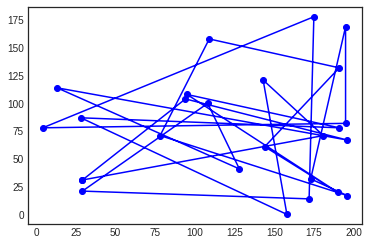

In [33]:
visualizaRota(listaCidades)

Em seguida, executar o algoritmo genético se dará em apenas uma chamada de função. É aqui que a arte se encontra com a ciência; você deve ver quais suposições funcionam melhor para você. Neste exemplo, temos 100 indivíduos em cada geração, mantemos 20 indivíduos de elite, usamos uma taxa de mutação de 1% para um determinado gene e percorremos 500 gerações:

In [37]:
rota = algoritmoGenetico(genoma=listaCidades, tamPopulacao=100, tamElite=20, taxaMutacao=0.01, geracoes=500)

Distância inicial: 1963.6237748417989
Distância final: 850.4209077159474


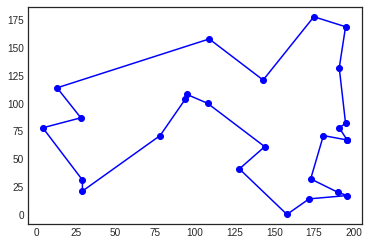

In [38]:
visualizaRota(rota)

### Bônus: visualizando a evolução

É ótimo saber nossa distância inicial e final e a rota proposta, mas seria negligente não ver como nossa distância melhorou ao longo do tempo. Com um simples ajuste para a nossa função ```algoritmoGenetico``` , podemos armazenar a distância mais curta de cada geração em uma lista de progresso e retorná-la, junto com a melhor rota e em seguida, plotar os resultados.

In [40]:
def algoritmoGeneticoComPlot(populacao, tamPopulacao, tamElite, taxaMutacao, geracoes):
    
    pop = iniciaPopulacao(tamPopulacao, populacao)
    progresso = []
    progresso.append(1. / ranquearRotas(pop)[0][1])  
    print("Distância inicial: " + str(progresso[0]))
    print("Evoluindo...")
    for i in range(0, geracoes):
        pop = proximaGeracao(pop, tamElite, taxaMutacao)
        progresso.append(1 / ranquearRotas(pop)[0][1])
        if i%100 == 0: 
            print('')
            print(f'Geração {i}: {progresso[-1]}', end='')
        elif i%10 == 0: 
            print('.',end='')
    print('')
    print("Distância final: " + str(progresso[-1]))
    indiceMelhorRota = ranquearRotas(pop)[0][0]
    melhor = pop[indiceMelhorRota]
    return (melhor, progresso)

Agora, basta rodar o novo algoritmo, com os mesmos dados:

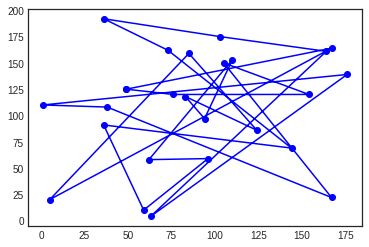

In [44]:
listaCidades = []

for i in range(0,25):
    listaCidades.append(Cidade(x=int(random.random() * 200), y=int(random.random() * 200)))
    
visualizaRota(listaCidades)

In [45]:
melhor, progresso = algoritmoGeneticoComPlot(populacao=listaCidades, tamPopulacao=100, tamElite=10, taxaMutacao=0.01, geracoes=500)

Distância inicial: 1937.087975106849
Evoluindo...

Geração 0: 1737.4315816442163.........
Geração 100: 1003.533978812372.........
Geração 200: 957.3461583205072.........
Geração 300: 927.3913989652154.........
Geração 400: 927.3913989652152.........
Distância final: 918.5175785040634


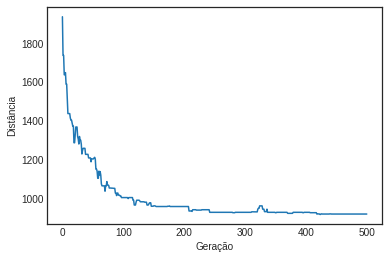

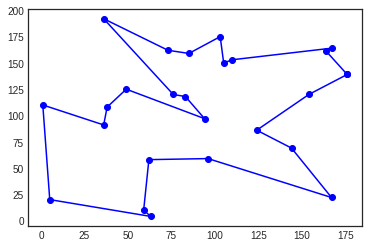

In [46]:
plt.figure();
plt.plot(progresso)
plt.ylabel('Distância')
plt.xlabel('Geração')
plt.show()
visualizaRota(melhor)